# Dsarthria Detection using Support Vector Machine

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd

In [3]:
df = pd.read_csv('/kaggle/input/dysarthria-detection/torgo_data/data.csv')
df

is_dysarthria  gender  \
0     non_dysarthria  female   
1     non_dysarthria  female   
2     non_dysarthria  female   
3     non_dysarthria  female   
4     non_dysarthria  female   
...              ...     ...   
1995      dysarthria    male   
1996      dysarthria    male   
1997      dysarthria    male   
1998      dysarthria    male   
1999      dysarthria    male   

                                               filename  
0     torgo_data/non_dysarthria_female/FC03_Session2...  
1     torgo_data/non_dysarthria_female/FC02_Session3...  
2     torgo_data/non_dysarthria_female/FC02_Session3...  
3     torgo_data/non_dysarthria_female/FC03_Session2...  
4     torgo_data/non_dysarthria_female/FC03_Session1...  
...                                                 ...  
1995   torgo_data/dysarthria_male/M03_Session2_0144.wav  
1996   torgo_data/dysarthria_male/M02_Session1_0005.wav  
1997   torgo_data/dysarthria_male/M03_Session2_0040.wav  
1998   torgo_data/dysarthria_male/M03_Session2_0260.wav  
1999   torgo_data/dysarthria_male/M03_Session2_0145.wav  

[2000 rows x 3 columns]

In [4]:
#This is to rename each filename with its new path on kaggle 
df['filename'] = df['filename'].apply(lambda x: os.path.join('/kaggle/input/dysarthria-detection',x))

In [5]:
df

is_dysarthria  gender  \
0     non_dysarthria  female   
1     non_dysarthria  female   
2     non_dysarthria  female   
3     non_dysarthria  female   
4     non_dysarthria  female   
...              ...     ...   
1995      dysarthria    male   
1996      dysarthria    male   
1997      dysarthria    male   
1998      dysarthria    male   
1999      dysarthria    male   

                                               filename  
0     /kaggle/input/dysarthria-detection/torgo_data/...  
1     /kaggle/input/dysarthria-detection/torgo_data/...  
2     /kaggle/input/dysarthria-detection/torgo_data/...  
3     /kaggle/input/dysarthria-detection/torgo_data/...  
4     /kaggle/input/dysarthria-detection/torgo_data/...  
...                                                 ...  
1995  /kaggle/input/dysarthria-detection/torgo_data/...  
1996  /kaggle/input/dysarthria-detection/torgo_data/...  
1997  /kaggle/input/dysarthria-detection/torgo_data/...  
1998  /kaggle/input/dysarthria-detection/torgo_data/...  
1999  /kaggle/input/dysarthria-detection/torgo_data/...  

[2000 rows x 3 columns]

In [6]:
#Getting a random sample to visualize from each class
male_dysarthric = df[(df['gender']=='male') & (df['is_dysarthria']=='dysarthria')].sample(1)
female_dysarthric = df[(df['gender']=='female') & (df['is_dysarthria']=='dysarthria')].sample(1)
male_ndysarthric = df[(df['gender']=='male') & (df['is_dysarthria']=='non_dysarthria')].sample(1)
female_ndysarthric = df[(df['gender']=='female') & (df['is_dysarthria']=='non_dysarthria')].sample(1)

# Visualizing each sample with its row record

In [7]:
male_dysarthric

is_dysarthria gender                                           filename
1865    dysarthria   male  /kaggle/input/dysarthria-detection/torgo_data/...

In [8]:
# The dysarthric male audio
ipd.Audio(male_dysarthric.iloc[0].filename)

In [9]:
female_dysarthric

is_dysarthria  gender                                           filename
524    dysarthria  female  /kaggle/input/dysarthria-detection/torgo_data/...

In [10]:
# The dysarthric female audio
ipd.Audio(female_dysarthric.iloc[0].filename)

In [11]:
male_ndysarthric

is_dysarthria gender                                           filename
1448  non_dysarthria   male  /kaggle/input/dysarthria-detection/torgo_data/...

In [12]:
# The non-dysarthric male audio
ipd.Audio(male_ndysarthric.iloc[0].filename)

In [13]:
female_ndysarthric

is_dysarthria  gender                                           filename
365  non_dysarthria  female  /kaggle/input/dysarthria-detection/torgo_data/...

In [14]:
# The non-dysarthric female audio
ipd.Audio(female_ndysarthric.iloc[0].filename)

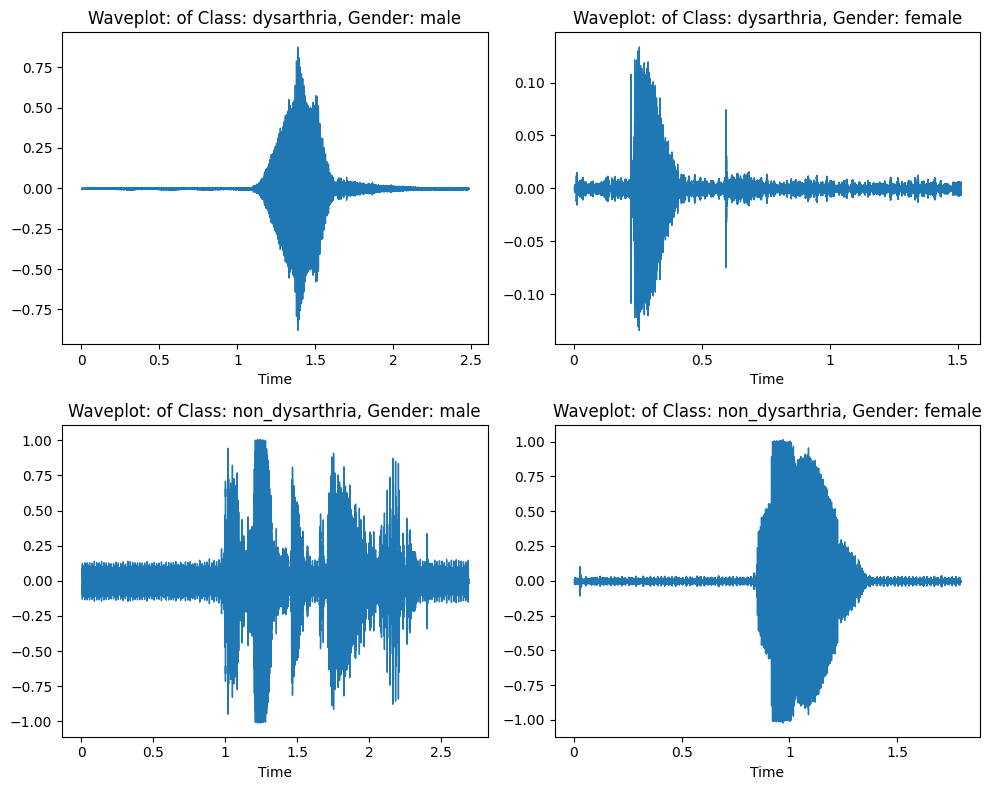

In [15]:
file_paths = [male_dysarthric, female_dysarthric, male_ndysarthric, female_ndysarthric]

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    # Load each audio file
    y, sr = librosa.load(file_paths[i].iloc[0].filename)
    
    # Generate a librosa display plot for each audio file
    librosa.display.waveshow(y, sr=sr, ax=ax)
    
    # Customize subplot title
    ax.set_title(f"Waveplot: of Class: {file_paths[i].iloc[0].is_dysarthria}, Gender: {file_paths[i].iloc[0].gender}")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Visualizing the central centroid of each file

In [16]:
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

def show_spectral_rolloff(audio_path,label,gender):
    plt.figure(figsize=(20, 5))
    plt.title(f'Spectral Rolloff of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr, roll_percent=0.01)[0]
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_rolloff), color='r')
    plt.show()

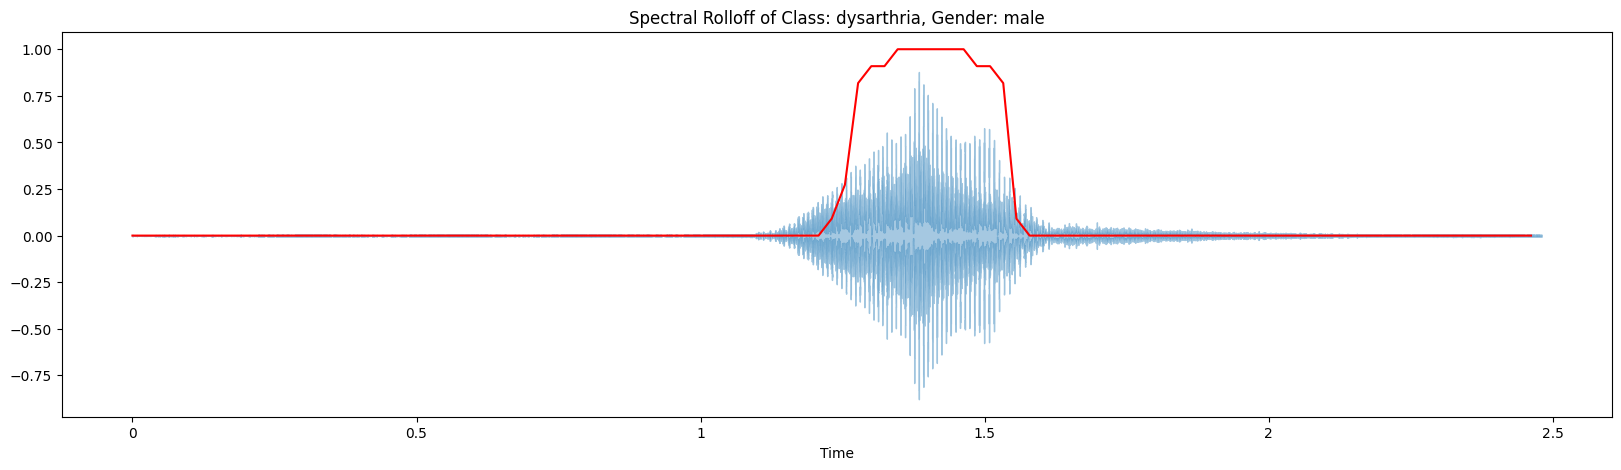

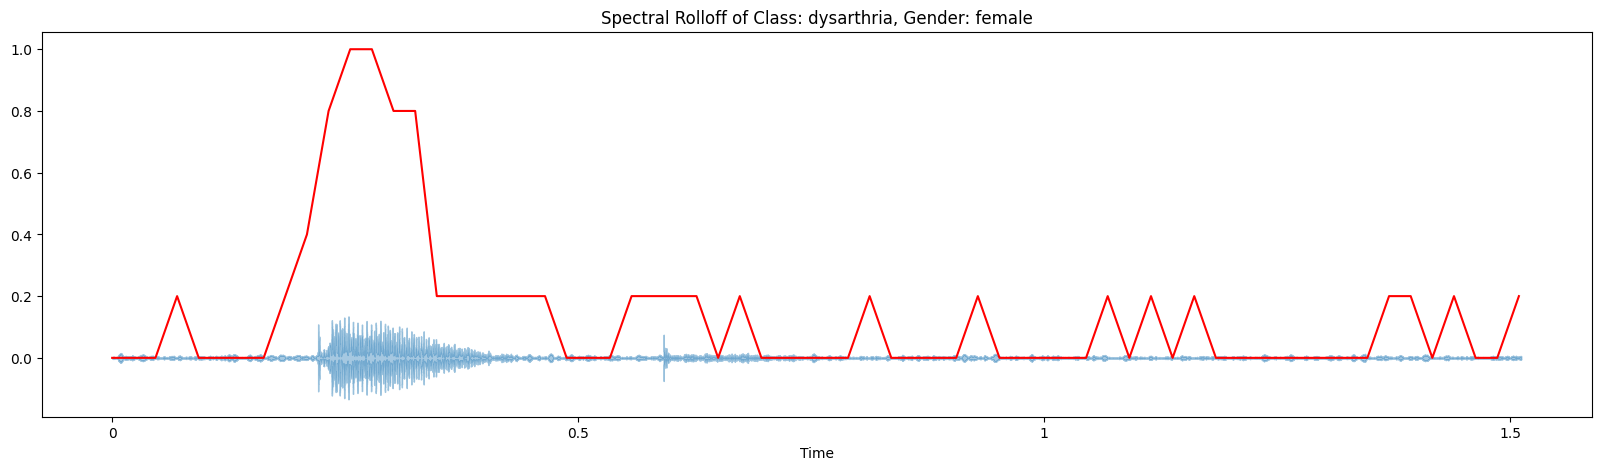

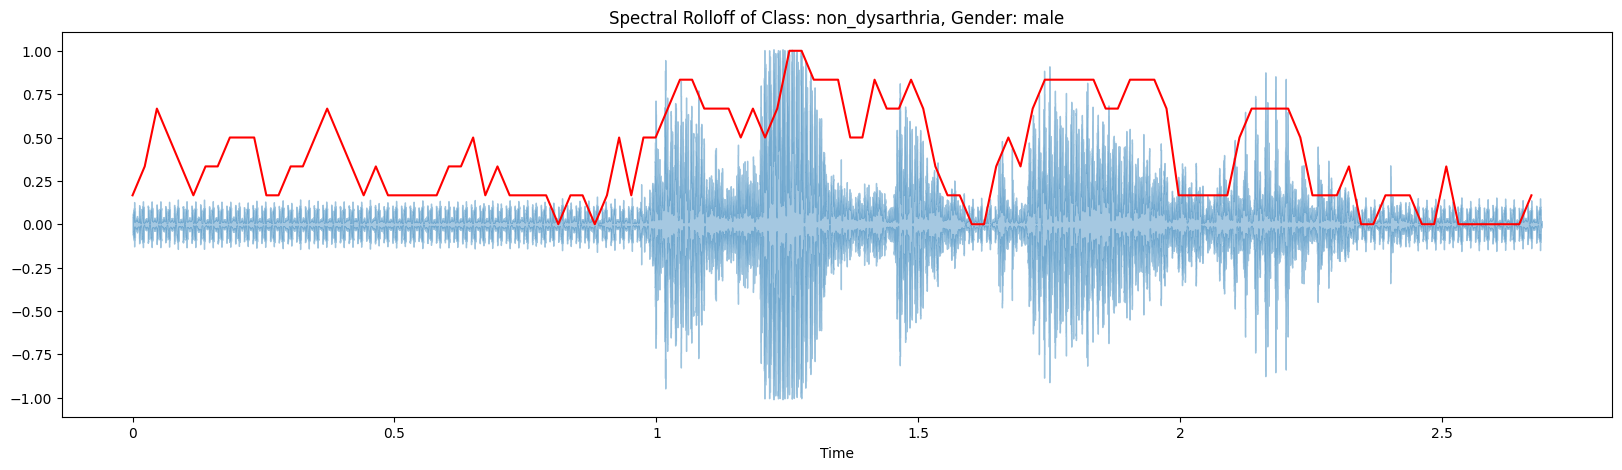

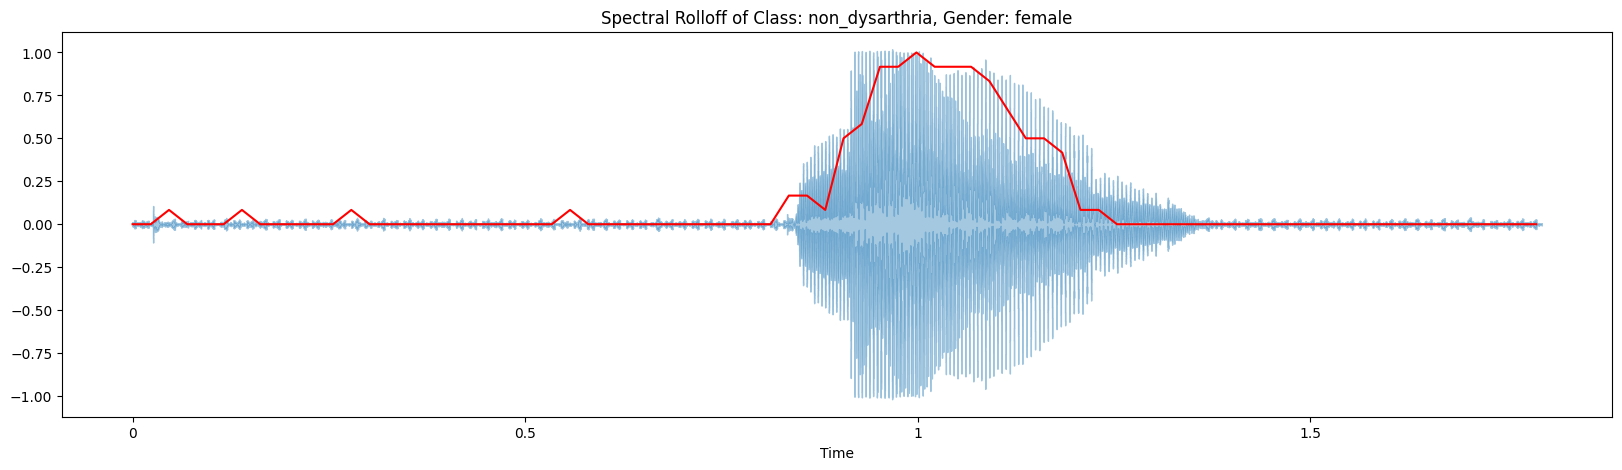

In [17]:
show_spectral_rolloff(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_spectral_rolloff(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_spectral_rolloff(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_spectral_rolloff(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

# Data Augmentation
## Noise Injection

In [12]:
import soundfile as sf

def add_noise_to_audio(audio, noise_level=0.01):  # Increased noise level
    noise = np.random.randn(len(audio))
    augmented_audio = audio + noise_level * noise
    return augmented_audio

# Assuming 'df' is your original DataFrame

print(f"Original df size: {df.shape[0]}")  # Check initial size of the original DataFrame

# Create a copy to work with the noisy samples
noisy_df = df.copy()

# Randomly select 600 samples for augmentation
indices = np.random.choice(noisy_df.shape[0], size=600, replace=False)
print(f"Number of unique indices selected for noise addition: {len(set(indices))}")  # Should be 600

noisy_samples = noisy_df.iloc[indices]

# Apply noise to each selected sample and update the DataFrame
for index in indices:
    row = noisy_df.loc[index]
    audio, sr = librosa.load(row['filename'], sr=None)
    noisy_audio = add_noise_to_audio(audio)
    
    # Construct the noisy filename
    file_path, file_extension = os.path.splitext(row['filename'])
    noisy_filename = f"{file_path}_noisy{file_extension}"
    
    # Save the noisy audio in the same directory as the original sample
    sf.write(noisy_filename, noisy_audio, sr)
    
    # Update the DataFrame with the noisy filename
    noisy_df.loc[index, 'filename'] = noisy_filename

print(f"Noisy df size before concatenation: {noisy_df.shape[0]}")  # Check size of the noisy DataFrame

# Concatenate the original samples with only the modified noisy samples
augmented_df = pd.concat([df, noisy_df.iloc[indices]])

print(f"Augmented df size after adding noisy samples: {augmented_df.shape[0]}")  # Should be 2600 now

# Reset index to avoid any duplicates from the concatenation
augmented_df = augmented_df.reset_index(drop=True)

In [223]:
data_augmented = pd.read_csv('/kaggle/input/augmented-csv/data_augmented.csv')
data_augmented['filename'] = data_augmented['filename'].apply(lambda x: os.path.join('/kaggle/input/dysarthria-detection-augmented/torgo_data_augmented',x))
data_augmented

is_dysarthria  gender  \
0     non_dysarthria  female   
1     non_dysarthria  female   
2     non_dysarthria  female   
3     non_dysarthria  female   
4     non_dysarthria  female   
...              ...     ...   
2195      dysarthria  female   
2196      dysarthria    male   
2197  non_dysarthria  female   
2198      dysarthria  female   
2199      dysarthria    male   

                                               filename  
0     /kaggle/input/dysarthria-detection-augmented/t...  
1     /kaggle/input/dysarthria-detection-augmented/t...  
2     /kaggle/input/dysarthria-detection-augmented/t...  
3     /kaggle/input/dysarthria-detection-augmented/t...  
4     /kaggle/input/dysarthria-detection-augmented/t...  
...                                                 ...  
2195  /kaggle/input/dysarthria-detection-augmented/t...  
2196  /kaggle/input/dysarthria-detection-augmented/t...  
2197  /kaggle/input/dysarthria-detection-augmented/t...  
2198  /kaggle/input/dysarthria-detection-augmented/t...  
2199  /kaggle/input/dysarthria-detection-augmented/t...  

[2200 rows x 3 columns]

In [16]:
from IPython.display import Audio
audio, sr= librosa.load(male_dysarthric.iloc[0].filename)
noisy_audio = add_noise_to_audio(audio)
audio_widget = Audio(audio, rate=sr)
display(audio_widget)

# Save the audio file to the working directory
import soundfile as sf
filename = "/kaggle/working/Augmented_files/my_audio_file2.wav"
sf.write(filename, noisy_audio, sr)

LibsndfileError: Error opening '/kaggle/working/Augmented_files/my_audio_file2.wav': System error.

In [52]:
#Getting a random sample to visualize from each class
data_md = df[(df['gender']=='male') & (df['is_dysarthria']=='dysarthria')]
data_fd = df[(df['gender']=='female') & (df['is_dysarthria']=='dysarthria')]
data_mnd = df[(df['gender']=='male') & (df['is_dysarthria']=='non_dysarthria')]
data_fnd = df[(df['gender']=='female') & (df['is_dysarthria']=='non_dysarthria')]
datasets = [data_md, data_fd, data_mnd, data_fnd]

# Feature extraction from the audio files

In [18]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [185]:
def feature_extraction(df):
    features = []
    for i,record in tqdm(df.iterrows(),total=df.shape[0]):
        try:
            x , sr = librosa.load(record['filename'])
            mean_mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=52),axis=1)
            features.append(mean_mfcc)
        except EOFError:
            pass
        
    dataf = pd.DataFrame(features)
    dataf['class'] = df['is_dysarthria']
    dataf['gender'] = df['gender']
    return dataf

In [206]:
dataf = feature_extraction(df)
dataf

 30%|██▉       | 596/2000 [00:12<00:29, 47.83it/s]/tmp/ipykernel_42/4010397354.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  x , sr = librosa.load(record['filename'])
/opt/conda/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 78%|███████▊  | 1551/2000 [00:31<00:11, 39.85it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=209
  warnings.warn(
 78%|███████▊  | 1566/2000 [00:32<00:09, 43.55it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=583
  warnings.warn(
 80%|███████▉  | 1597/2000 [00:33<00:09, 43.32it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarnin

0           1          2          3          4          5  \
0    -221.788269  101.259216 -16.548122  38.492058 -13.595644  20.772551   
1    -299.520050  109.872574 -17.097256  38.854958 -16.881124  22.959129   
2    -302.950043  112.048462 -23.679873  44.887409 -22.434721  26.299330   
3    -210.861603  116.504486 -35.046494  37.670425 -27.112513  25.593725   
4    -280.227203  104.505035 -17.209875  45.064884 -15.542119  28.115065   
...          ...         ...        ...        ...        ...        ...   
1994 -304.231995  115.359306  -0.794741  26.543352  -0.682189  13.183387   
1995 -457.822174  110.087799  22.221987  -0.056087 -11.181323   3.190088   
1996 -371.546875  116.846909   5.667278  22.488142   8.221017   7.740132   
1997 -302.500732  112.511192  -4.506536  32.498360  -1.519379   4.109806   
1998 -385.800110   96.079300   8.155586  31.456226  -5.310202  17.052404   

             6          7         8         9  ...        44        45  \
0    -5.536345  10.410688  1.962462 -0.799047  ... -2.533782 -3.268038   
1     1.824232  18.724186  3.448544  4.455821  ... -4.145552 -6.175988   
2     0.811482  18.210289  4.344699  4.912155  ... -4.759408 -6.019825   
3    -7.511985  13.140750 -0.587347  4.138087  ... -4.829739 -2.834775   
4    -3.449207  16.841438  4.573242  1.738296  ... -4.283849 -4.913657   
...        ...        ...       ...       ...  ...       ...       ...   
1994  2.389222   4.290237 -1.372811 -2.624717  ... -0.417272 -0.158795   
1995 -4.499058   4.474745  5.809546 -1.913331  ...  1.435318  3.933249   
1996  8.989121   9.996634  4.383992  3.590932  ... -1.743503 -1.175237   
1997  4.611476   9.744306 -2.962905 -3.497744  ...  0.254733  1.642104   
1998  8.346519  12.127320  3.636643  0.342048  ... -0.164821 -1.014939   

            46        47        48        49        50        51  \
0    -3.505790 -4.378566 -3.566866 -2.126481  0.093478  0.573753   
1    -4.736931 -3.575079 -2.273668 -2.654510  0.005698  0.287233   
2    -4.420382 -4.656934 -3.056204 -2.664175 -0.079402  0.063501   
3    -2.319857 -2.866347 -0.914686 -2.401096  0.403968 -0.781323   
4    -5.072458 -3.424460 -1.660468 -2.931082  1.067604  0.865088   
...        ...       ...       ...       ...       ...       ...   
1994  0.454468  3.905170  4.707629  2.294123  3.421515  4.456720   
1995  4.134492  4.037061  3.466415  0.180331  1.013476  1.111604   
1996 -1.418737  3.209233  2.514803  2.996848  5.337800  4.317722   
1997  2.249798  1.884176  2.619833  3.649645  3.742611  2.558885   
1998 -1.731204  2.538839  2.291887  0.161350  1.850457  3.733321   

               class  gender  
0     non_dysarthria  female  
1     non_dysarthria  female  
2     non_dysarthria  female  
3     non_dysarthria  female  
4     non_dysarthria  female  
...              ...     ...  
1994      dysarthria    male  
1995      dysarthria    male  
1996      dysarthria    male  
1997      dysarthria    male  
1998      dysarthria    male  

[1999 rows x 54 columns]

In [207]:
dataf['class'] = dataf['class'].replace('non_dysarthria',0)
dataf['class'] = dataf['class'].replace('dysarthria',1)
dataf['gender'] = dataf['gender'].replace('male', 1)
dataf['gender'] = dataf['gender'].replace('female', 0)
dataf

0           1          2          3          4          5  \
0    -221.788269  101.259216 -16.548122  38.492058 -13.595644  20.772551   
1    -299.520050  109.872574 -17.097256  38.854958 -16.881124  22.959129   
2    -302.950043  112.048462 -23.679873  44.887409 -22.434721  26.299330   
3    -210.861603  116.504486 -35.046494  37.670425 -27.112513  25.593725   
4    -280.227203  104.505035 -17.209875  45.064884 -15.542119  28.115065   
...          ...         ...        ...        ...        ...        ...   
1994 -304.231995  115.359306  -0.794741  26.543352  -0.682189  13.183387   
1995 -457.822174  110.087799  22.221987  -0.056087 -11.181323   3.190088   
1996 -371.546875  116.846909   5.667278  22.488142   8.221017   7.740132   
1997 -302.500732  112.511192  -4.506536  32.498360  -1.519379   4.109806   
1998 -385.800110   96.079300   8.155586  31.456226  -5.310202  17.052404   

             6          7         8         9  ...        44        45  \
0    -5.536345  10.410688  1.962462 -0.799047  ... -2.533782 -3.268038   
1     1.824232  18.724186  3.448544  4.455821  ... -4.145552 -6.175988   
2     0.811482  18.210289  4.344699  4.912155  ... -4.759408 -6.019825   
3    -7.511985  13.140750 -0.587347  4.138087  ... -4.829739 -2.834775   
4    -3.449207  16.841438  4.573242  1.738296  ... -4.283849 -4.913657   
...        ...        ...       ...       ...  ...       ...       ...   
1994  2.389222   4.290237 -1.372811 -2.624717  ... -0.417272 -0.158795   
1995 -4.499058   4.474745  5.809546 -1.913331  ...  1.435318  3.933249   
1996  8.989121   9.996634  4.383992  3.590932  ... -1.743503 -1.175237   
1997  4.611476   9.744306 -2.962905 -3.497744  ...  0.254733  1.642104   
1998  8.346519  12.127320  3.636643  0.342048  ... -0.164821 -1.014939   

            46        47        48        49        50        51  class  \
0    -3.505790 -4.378566 -3.566866 -2.126481  0.093478  0.573753      0   
1    -4.736931 -3.575079 -2.273668 -2.654510  0.005698  0.287233      0   
2    -4.420382 -4.656934 -3.056204 -2.664175 -0.079402  0.063501      0   
3    -2.319857 -2.866347 -0.914686 -2.401096  0.403968 -0.781323      0   
4    -5.072458 -3.424460 -1.660468 -2.931082  1.067604  0.865088      0   
...        ...       ...       ...       ...       ...       ...    ...   
1994  0.454468  3.905170  4.707629  2.294123  3.421515  4.456720      1   
1995  4.134492  4.037061  3.466415  0.180331  1.013476  1.111604      1   
1996 -1.418737  3.209233  2.514803  2.996848  5.337800  4.317722      1   
1997  2.249798  1.884176  2.619833  3.649645  3.742611  2.558885      1   
1998 -1.731204  2.538839  2.291887  0.161350  1.850457  3.733321      1   

      gender  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
1994       1  
1995       1  
1996       1  
1997       1  
1998       1  

[1999 rows x 54 columns]

In [192]:
data_aug_f = feature_extraction(data_augmented)
data_aug_f['class'] = data_aug_f['class'].replace('non_dysarthria',0)
data_aug_f['class'] = data_aug_f['class'].replace('dysarthria',1)
data_aug_f['gender'] = data_aug_f['gender'].replace('male', 1)
data_aug_f['gender'] = data_aug_f['gender'].replace('female', 0)
data_aug_f

 27%|██▋       | 596/2200 [00:13<00:42, 37.76it/s]/tmp/ipykernel_42/4010397354.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  x , sr = librosa.load(record['filename'])
/opt/conda/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 71%|███████   | 1553/2200 [00:32<00:17, 37.89it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=209
  warnings.warn(
 71%|███████▏  | 1568/2200 [00:32<00:14, 43.76it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=583
  warnings.warn(
 73%|███████▎  | 1598/2200 [00:33<00:13, 45.86it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarnin

0           1          2          3          4          5  \
0    -221.788269  101.259216 -16.548122  38.492058 -13.595644  20.772551   
1    -299.520050  109.872574 -17.097256  38.854958 -16.881124  22.959129   
2    -302.950043  112.048462 -23.679873  44.887409 -22.434721  26.299330   
3    -210.861603  116.504486 -35.046494  37.670425 -27.112513  25.593725   
4    -280.227203  104.505035 -17.209875  45.064884 -15.542119  28.115065   
...          ...         ...        ...        ...        ...        ...   
2194 -207.520752   92.323830 -19.405277  55.736633 -24.183550  39.558895   
2195 -254.905655   62.099068 -43.357635  57.467861 -31.910023  38.414719   
2196 -223.184799   85.307915 -45.236393  57.718105 -33.519310  40.961269   
2197 -194.928177   98.557816 -31.105646  53.019772 -29.994665  45.539322   
2198 -262.906586   66.356735 -47.899548  56.022640 -38.047588  41.912098   

              6          7          8          9  ...        44        45  \
0     -5.536345  10.410688   1.962462  -0.799047  ... -2.533782 -3.268038   
1      1.824232  18.724186   3.448544   4.455821  ... -4.145552 -6.175988   
2      0.811482  18.210289   4.344699   4.912155  ... -4.759408 -6.019825   
3     -7.511985  13.140750  -0.587347   4.138087  ... -4.829739 -2.834775   
4     -3.449207  16.841438   4.573242   1.738296  ... -4.283849 -4.913657   
...         ...        ...        ...        ...  ...       ...       ...   
2194 -14.783093  25.242655  -5.281911   7.771843  ... -5.623349 -1.953366   
2195 -28.876957  22.310873 -14.013237   5.716329  ... -1.829793  3.697810   
2196 -18.624788  29.858118  -7.925423  13.186666  ... -5.512636 -0.357237   
2197 -19.284334  26.222717  -6.132613   7.749203  ... -5.808014 -1.153012   
2198 -29.994173  22.048843 -16.192322   6.587749  ... -0.547851  5.917575   

            46        47        48        49        50        51  class  \
0    -3.505790 -4.378566 -3.566866 -2.126481  0.093478  0.573753      0   
1    -4.736931 -3.575079 -2.273668 -2.654510  0.005698  0.287233      0   
2    -4.420382 -4.656934 -3.056204 -2.664175 -0.079402  0.063501      0   
3    -2.319857 -2.866347 -0.914686 -2.401096  0.403968 -0.781323      0   
4    -5.072458 -3.424460 -1.660468 -2.931082  1.067604  0.865088      0   
...        ...       ...       ...       ...       ...       ...    ...   
2194 -6.311985 -0.034964 -3.173546  0.846361 -1.335546 -0.335464      1   
2195 -2.126955  4.209430  0.403568  4.472802  0.698145  1.910248      1   
2196 -5.787001  0.577954 -5.366279 -0.403878 -2.040477  0.338521      1   
2197 -7.510495 -1.975651 -5.041314  0.407213 -1.540586 -1.078144      0   
2198 -0.736767  4.802420 -1.977090  2.042212 -1.227213  1.606352      1   

      gender  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
2194       0  
2195       0  
2196       1  
2197       0  
2198       0  

[2199 rows x 54 columns]

# Training the Model

## Training data without augmentation

In [225]:
shuffled_df = data_aug_f.sample(frac=1, random_state=42)
X = dataf.drop(columns = ['class'])
X.columns = X.columns.astype(str)
y = dataf['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42)

In [226]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'C':[0.5,1,10,100],
     'gamma':[10,1,0.1,0.001,0.00001],
     'kernel':['rbf'],
            }
           ]

optional_params=GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)
optional_params.fit(X_train,y_train)
print("Best parameters for original dataset:")
print(optional_params.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [227]:
from sklearn.svm import SVC
# Building and training our model
org_model = SVC(kernel='rbf', gamma=0.001, C=10)
org_model.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

In [ ]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

In [229]:
from sklearn.model_selection import KFold, cross_val_score 
k_folds = KFold(n_splits = 10)
scores = cross_val_score(org_model, X, y, cv = k_folds)
print("Model: Support Vector Machine")
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Model: Support Vector Machine
Cross Validation Scores:  [0.975      0.99       0.975      0.97       0.985      0.97
 0.965      0.98       0.985      0.97487437]
Average CV Score:  0.9769874371859297
Number of CV Scores used in Average:  10


## Training data with augmentation
while comparing between a normal version and standardized version

In [232]:
shuffled_df = data_aug_f.sample(frac=1, random_state=42)
X_aug = shuffled_df.drop(columns = ['class'])
X_aug.columns = X_aug.columns.astype(str)
y = shuffled_df['class']

X_train, X_test, y_train, y_test = train_test_split(X_aug, y, test_size=0.2, stratify=y, random_state = 42)

In [233]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X_aug)

In [234]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'C':[0.5,1,10,100],
     'gamma':[10,1,0.1,0.001,0.00001],
     'kernel':['rbf'],
            }
           ]

optional_params=GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)
optional_params.fit(X_train,y_train)
print("Best parameters for augmented dataset:")
print(optional_params.best_params_)

Best parameters for augmented dataset
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [235]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'C':[0.5,1,10,100],
     'gamma':[10,1,0.1,0.001,0.00001],
     'kernel':['rbf'],
            }
           ]

optional_params=GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)
optional_params.fit(X_train_scaled,y_train)
print("Best parameters for standardized augmented dataset:")
print(optional_params.best_params_)

Best parameters for augmented dataset
Best parameters for standardized augmented dataset:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [238]:
# Building and training our model
aug_model = SVC(kernel='rbf', gamma=0.001, C=100)
aug_model.fit(X_train, y_train)
predictions = aug_model.predict(X_test)
print("Augmented model: ", accuracy_score(y_test, predictions))

aug_modelstd = SVC(kernel='rbf', gamma=0.1, C=10)
aug_modelstd.fit(X_train_scaled, y_train)
std_predictions = aug_modelstd.predict(X_test_scaled)
print("Augmented standardized model: ", accuracy_score(y_test, std_predictions))

Augmented model:  0.9363636363636364
Augmented standardized model:  0.9431818181818182


In [245]:
k_folds = KFold(n_splits = 10)
scores = cross_val_score(aug_model, X_aug, y, cv = k_folds)
print("Model: Support Vector Machine")
print("Cross validation for the Augmented data")
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Model: Support Vector Machine
Cross validation for the Augmented data
Cross Validation Scores:  [0.92272727 0.92272727 0.93636364 0.93636364 0.95454545 0.94090909
 0.95       0.91363636 0.94090909 0.92237443]
Average CV Score:  0.9340556247405563
Number of CV Scores used in Average:  10


In [247]:
k_folds = KFold(n_splits = 10)
scores = cross_val_score(aug_modelstd, X_scaled, y, cv = k_folds)
print("Model: Support Vector Machine")
print("Cross validation for the Augmented standardized data")
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Model: Support Vector Machine
Cross validation for the Augmented standardized data
Cross Validation Scores:  [0.93181818 0.92272727 0.94545455 0.93636364 0.94090909 0.95
 0.95909091 0.94545455 0.96363636 0.94063927]
Average CV Score:  0.9436093814860937
Number of CV Scores used in Average:  10


### Plotting the confusion matrix of each version

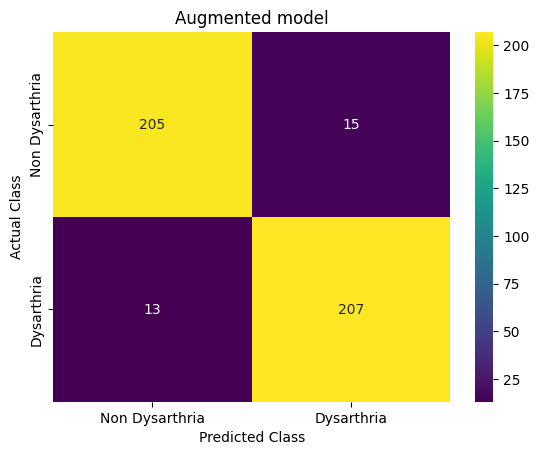

In [242]:
sns.heatmap(confusion_matrix(y_test, predictions),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title("Augmented model")
plt.show()


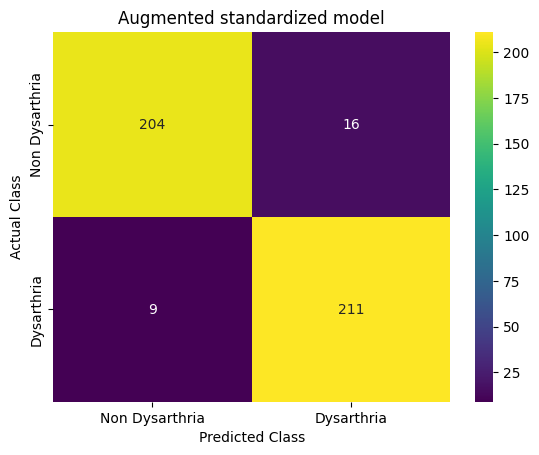

In [243]:
sns.heatmap(confusion_matrix(y_test, std_predictions),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title("Augmented standardized model")
plt.show()

## Explaining the results of the model
### Data explaination

In [251]:
def feature_extraction2d(df):
    features = []
    for i,record in tqdm(df.iterrows(),total=df.shape[0]):
        try:
            x , sr = librosa.load(record['filename'])
            mean_mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13),axis=1)
            features.append(mean_mfcc)
        except EOFError:
            pass
        
    dataf = pd.DataFrame(features)
    dataf['class'] = df['is_dysarthria']
    return dataf

### Selecting only the main 13 features of the MFCC

In [252]:
data2d = feature_extraction2d(df)
data2d

 30%|██▉       | 599/2000 [00:14<00:34, 40.14it/s]/tmp/ipykernel_42/3931597027.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  x , sr = librosa.load(record['filename'])
/opt/conda/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 78%|███████▊  | 1551/2000 [00:35<00:14, 30.58it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=209
  warnings.warn(
 78%|███████▊  | 1565/2000 [00:35<00:11, 39.31it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=583
  warnings.warn(
 80%|███████▉  | 1596/2000 [00:36<00:10, 38.37it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarnin

0           1          2          3          4          5  \
0    -221.788269  101.259216 -16.548122  38.492058 -13.595644  20.772551   
1    -299.520050  109.872574 -17.097256  38.854958 -16.881124  22.959129   
2    -302.950043  112.048462 -23.679873  44.887409 -22.434721  26.299330   
3    -210.861603  116.504486 -35.046494  37.670425 -27.112513  25.593725   
4    -280.227203  104.505035 -17.209875  45.064884 -15.542119  28.115065   
...          ...         ...        ...        ...        ...        ...   
1994 -304.231995  115.359306  -0.794741  26.543352  -0.682189  13.183387   
1995 -457.822174  110.087799  22.221987  -0.056087 -11.181323   3.190088   
1996 -371.546875  116.846909   5.667278  22.488142   8.221017   7.740132   
1997 -302.500732  112.511192  -4.506536  32.498360  -1.519379   4.109806   
1998 -385.800110   96.079300   8.155586  31.456226  -5.310202  17.052404   

             6          7         8         9         10        11         12  \
0    -5.536345  10.410688  1.962462 -0.799047   4.486315 -3.084389   8.914680   
1     1.824232  18.724186  3.448544  4.455821  10.253381 -4.456262  12.055587   
2     0.811482  18.210289  4.344699  4.912155  10.587207 -2.602109  12.450565   
3    -7.511985  13.140750 -0.587347  4.138087   2.849253 -6.713498  11.237249   
4    -3.449207  16.841438  4.573242  1.738296   7.362767 -3.352466  11.865890   
...        ...        ...       ...       ...        ...       ...        ...   
1994  2.389222   4.290237 -1.372811 -2.624717   0.579007 -2.561407  -1.639249   
1995 -4.499058   4.474745  5.809546 -1.913331   2.113782 -4.851532   1.483679   
1996  8.989121   9.996634  4.383992  3.590932   3.260836 -2.353365  -2.774049   
1997  4.611476   9.744306 -2.962905 -3.497744  -3.638211 -4.235168   0.177585   
1998  8.346519  12.127320  3.636643  0.342048   6.108461  0.147490   4.197144   

               class  
0     non_dysarthria  
1     non_dysarthria  
2     non_dysarthria  
3     non_dysarthria  
4     non_dysarthria  
...              ...  
1994      dysarthria  
1995      dysarthria  
1996      dysarthria  
1997      dysarthria  
1998      dysarthria  

[1999 rows x 14 columns]

### Plotting each feature with each other
They are not linearly separable

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

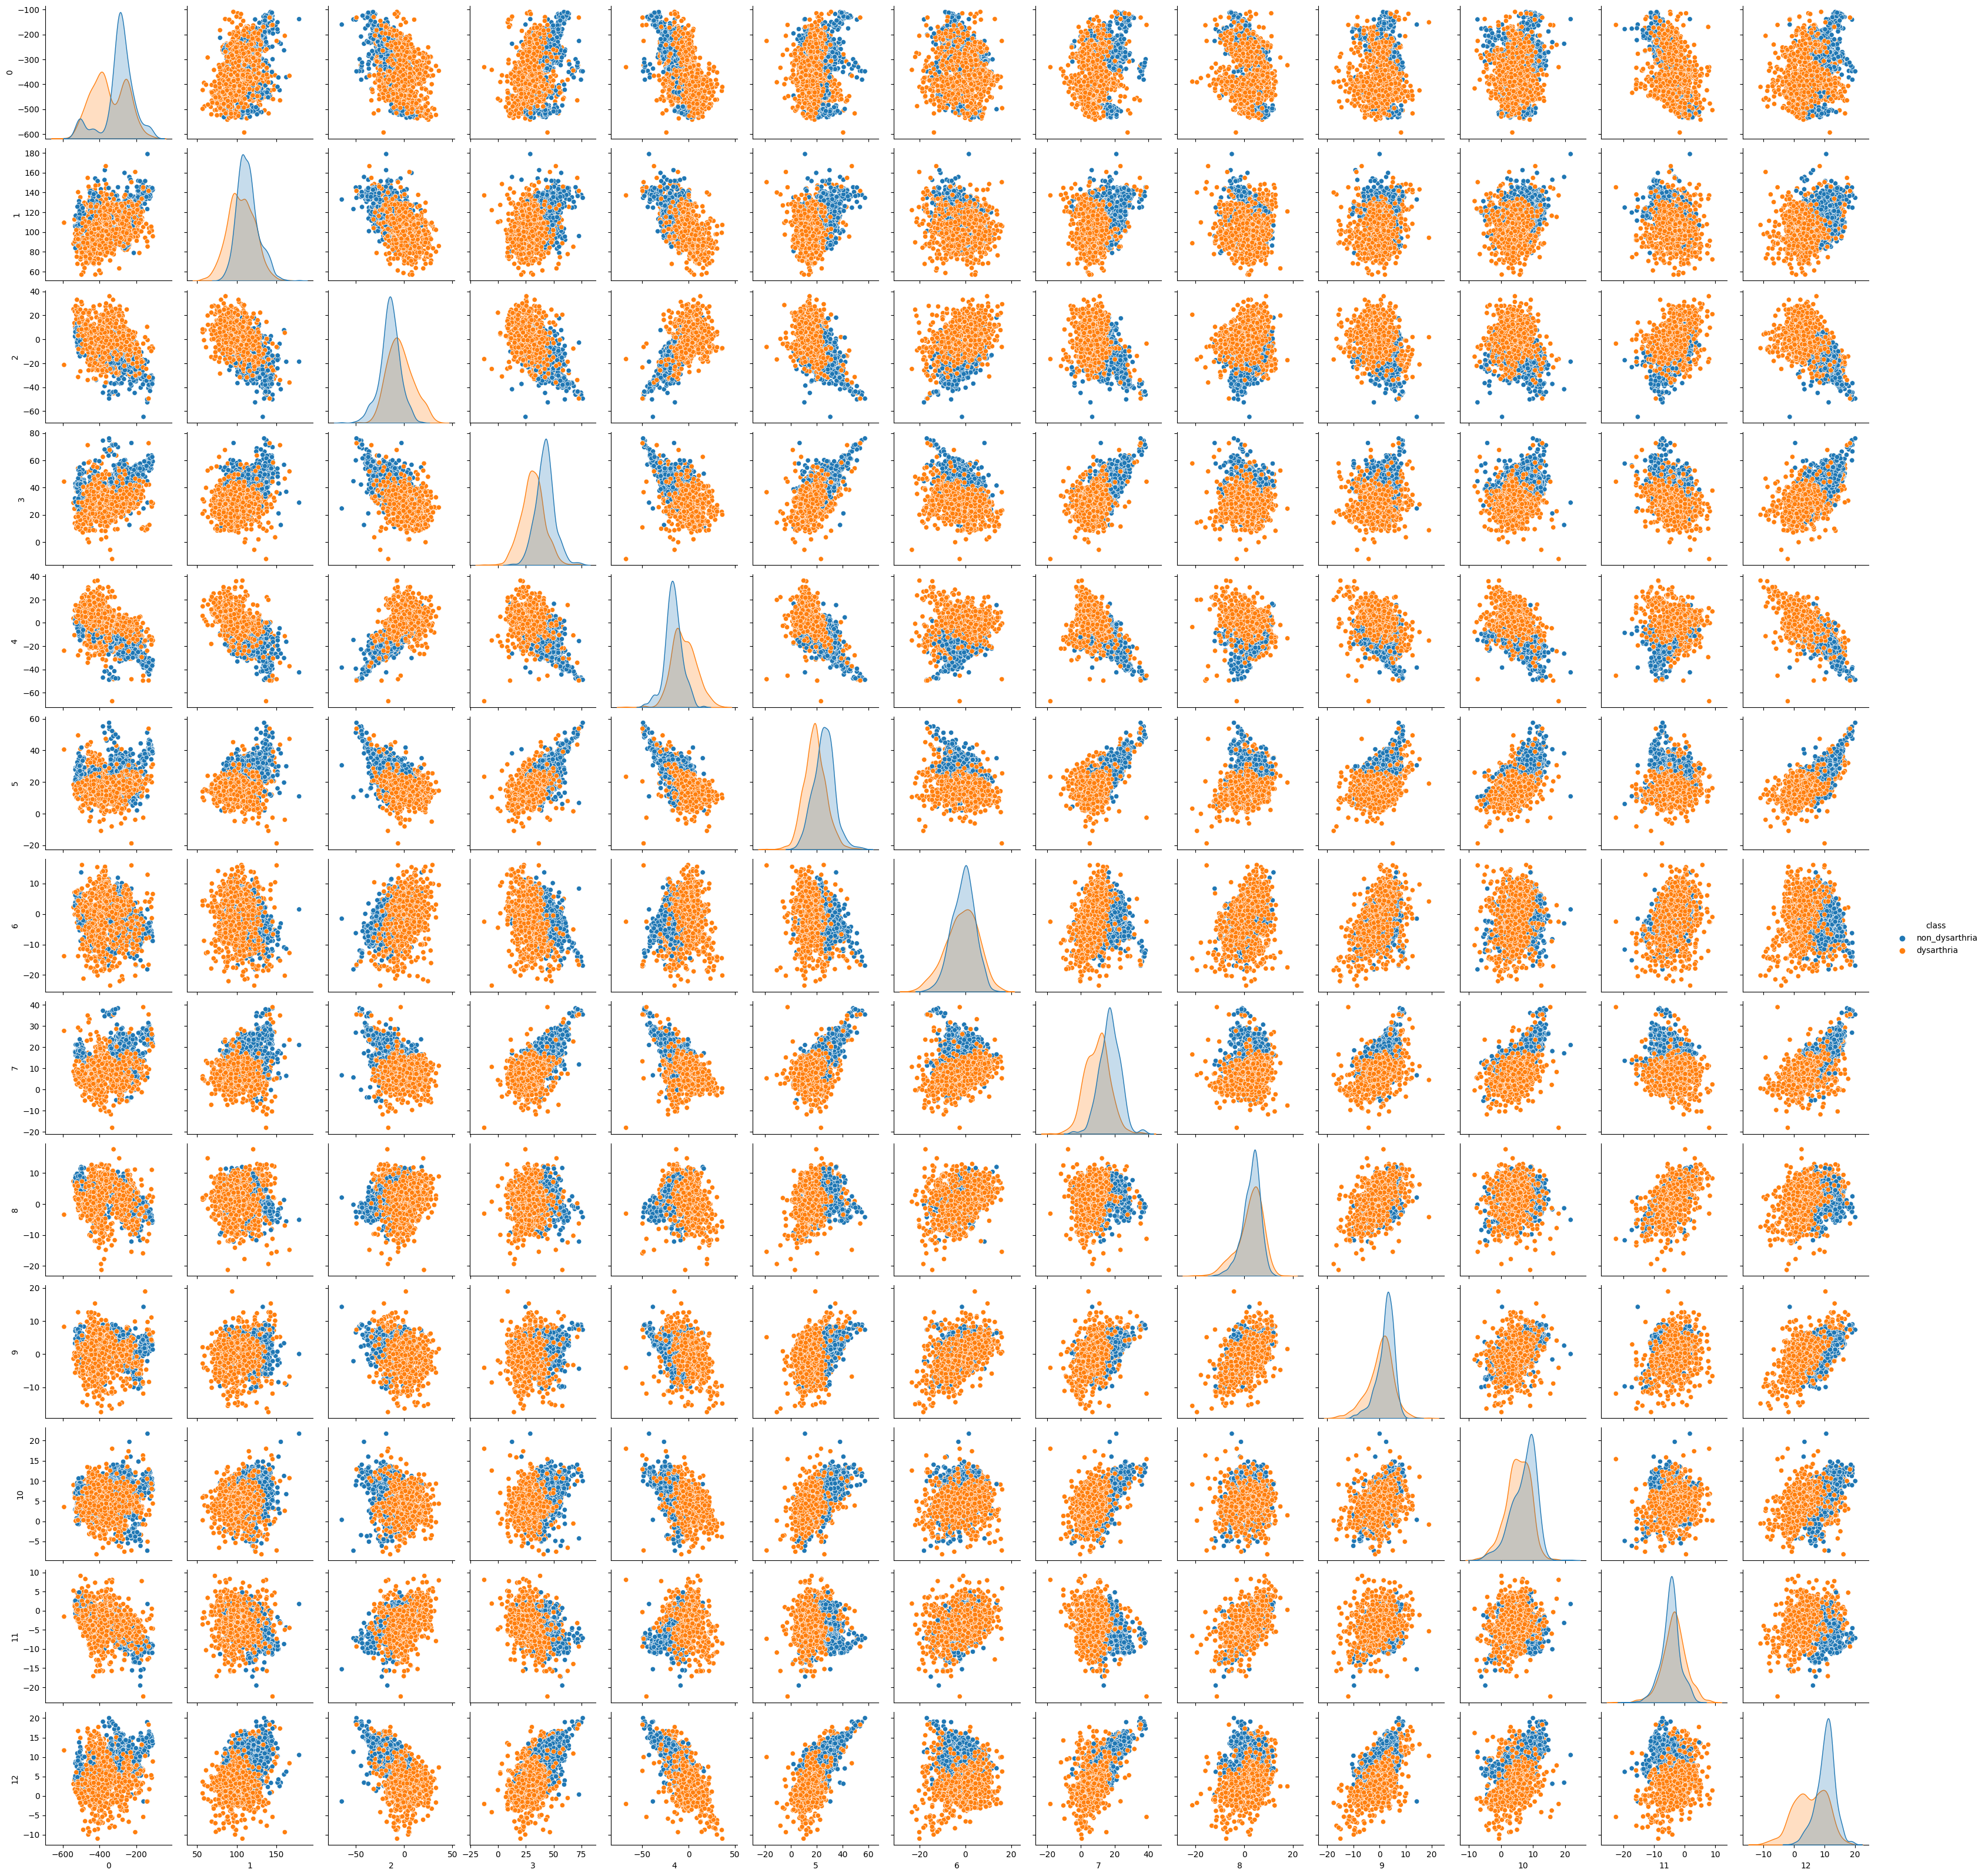

In [253]:
pairplot = sns.pairplot(data2d, hue="class")

# Save the pairplot to an image file (e.g., PNG)
pairplot.savefig("pairplot_result.png")

# Show the pairplot (optional)
plt.show()

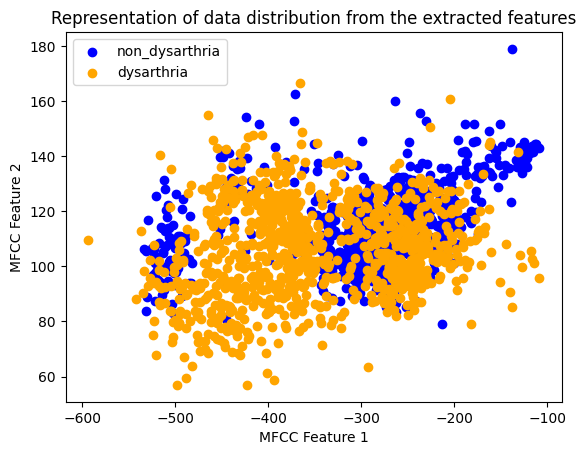

In [256]:
class_0 = data2d[data2d['class'] == 'non_dysarthria']
class_1 = data2d[data2d['class'] == 'dysarthria']

# Scatter plot
plt.scatter(class_0[0], class_0[1], color='blue', label='non_dysarthria')
plt.scatter(class_1[0], class_1[1], color='orange', label='dysarthria')


# Set labels and title
plt.xlabel('MFCC Feature 1')
plt.ylabel('MFCC Feature 2')
plt.title('Representation of data distribution from the extracted features')

# Show legend
plt.legend()

# Show the plot
plt.show()